<a href="https://colab.research.google.com/github/nigmu/Crop-Recomendation-Model/blob/main/model_2_gcollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMClassifier
from tqdm import tqdm
import time
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


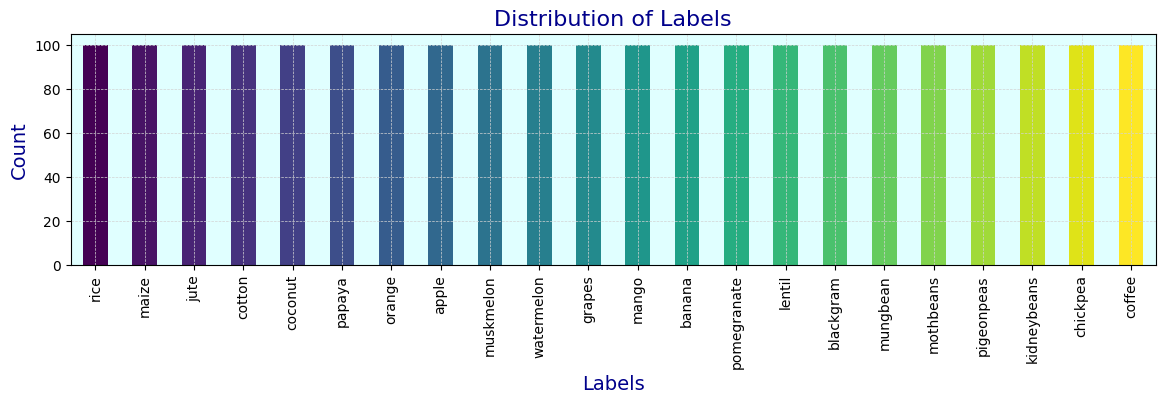

In [4]:
# import matplotlib.pyplot as plt

# labels = df["label"].unique()
# label_counts = df["label"].value_counts()

# plt.figure(figsize=(10, 6))
# label_counts.plot(kind="bar", color='navy')

# plt.gca().set_facecolor('lightblue')

# plt.title("Distribution of Labels", fontsize=16)
# plt.xlabel("Labels", fontsize=14)
# plt.ylabel("Count", fontsize=14)

# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already defined and contains the necessary data
labels = df["label"].unique()
label_counts = df["label"].value_counts()

# Generate a list of colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(label_counts)))

plt.figure(figsize=(14, 3))

# Plot with different colors for each bar
label_counts.plot(kind="bar", color=colors)

# Set a colorful background
plt.gca().set_facecolor('lightcyan')

# Customize the plot
plt.title("Distribution of Labels", fontsize=16, color='darkblue')
plt.xlabel("Labels", fontsize=14, color='darkblue')
plt.ylabel("Count", fontsize=14, color='darkblue')

# Add grid lines with a different color
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


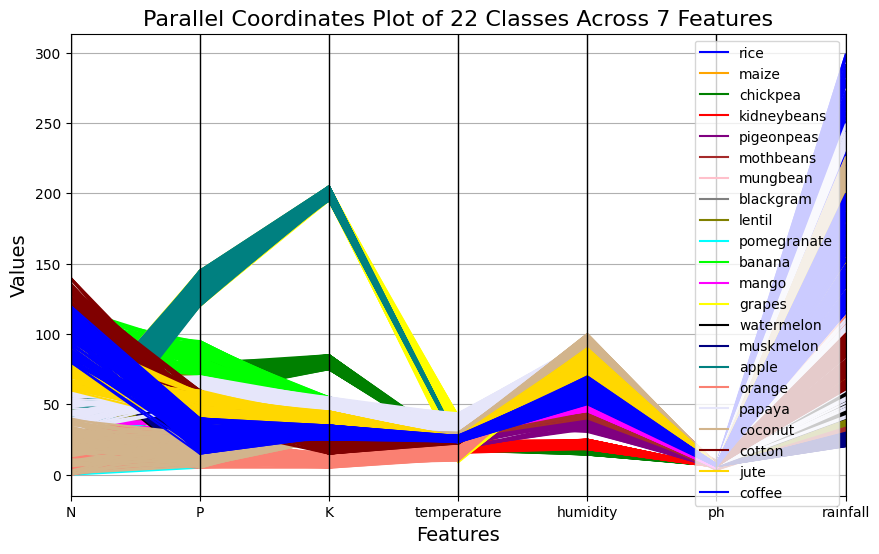

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains the dataset with 22 classes and 7 features

# Plot the parallel coordinates plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'label', color=('blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'magenta', 'yellow', 'black', 'navy', 'teal', 'salmon', 'lavender', 'tan', 'maroon', 'gold'))

# Add title and labels
plt.title("Parallel Coordinates Plot of 22 Classes Across 7 Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)

plt.show()


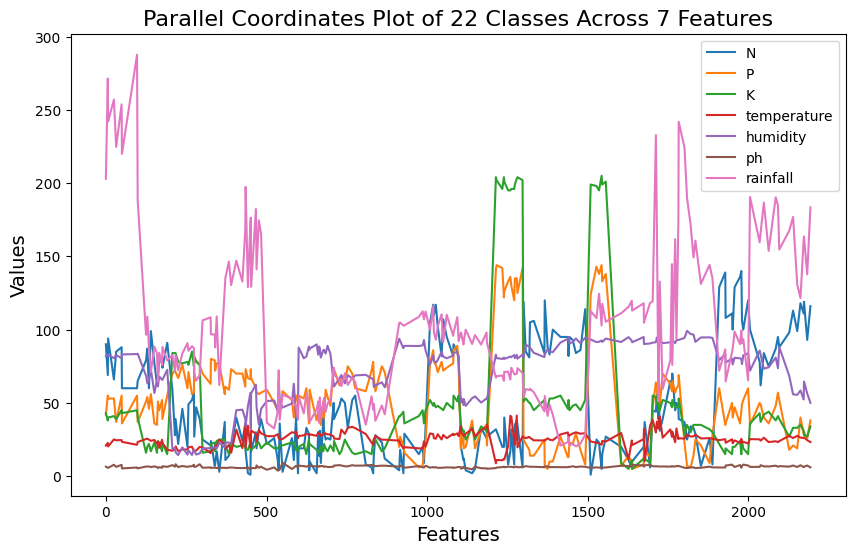

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the dataset with 22 classes and 7 features

# Plot the parallel coordinates plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.sample(frac=0.1), dashes=False)

# Add title and labels
plt.title("Parallel Coordinates Plot of 22 Classes Across 7 Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)

plt.show()


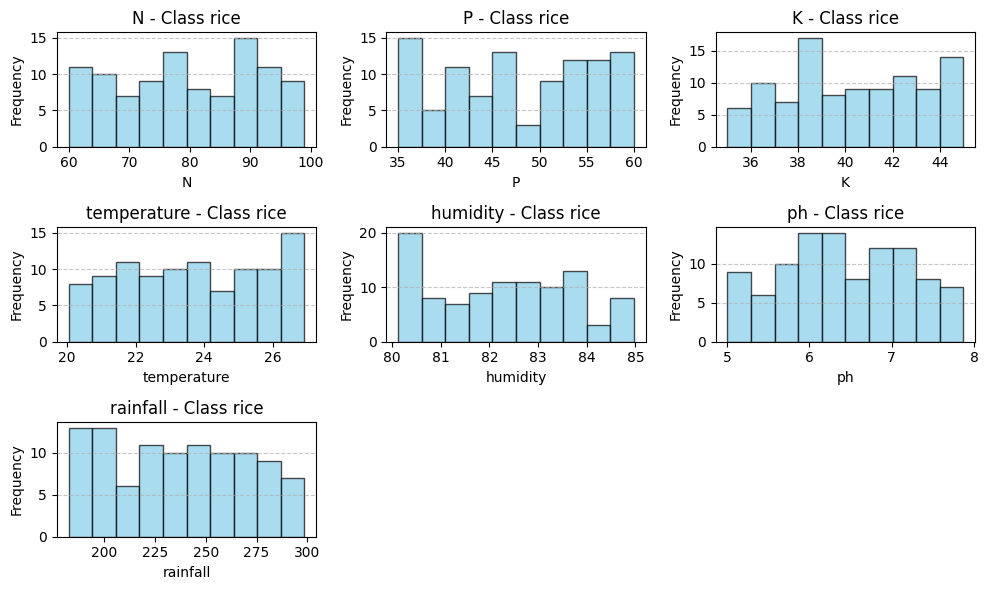

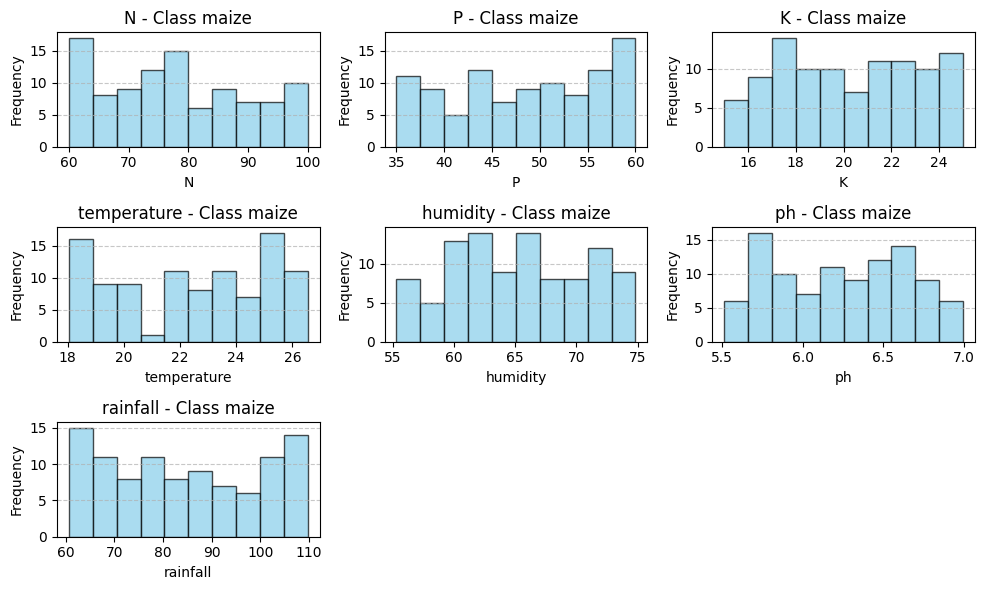

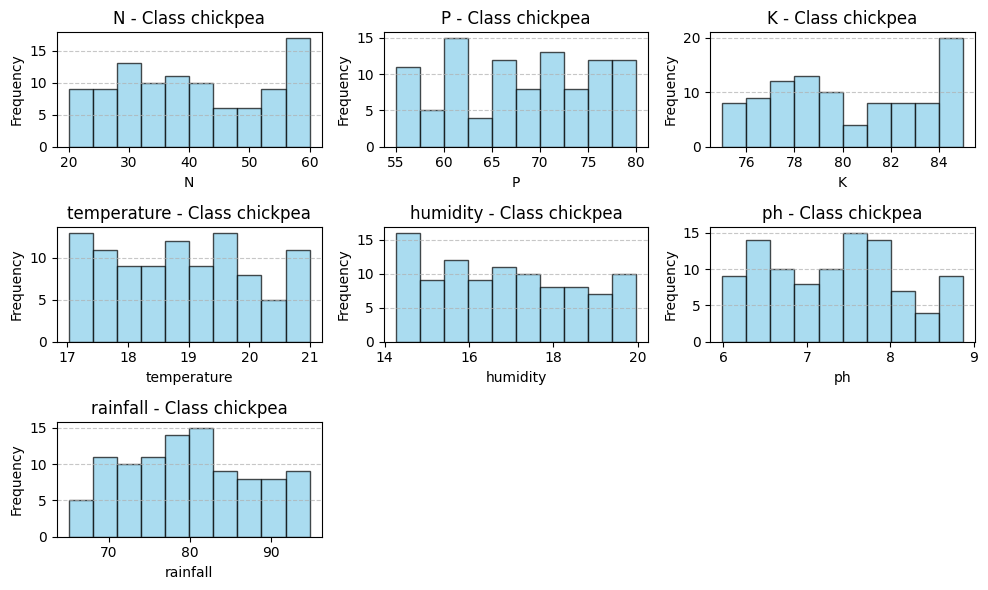

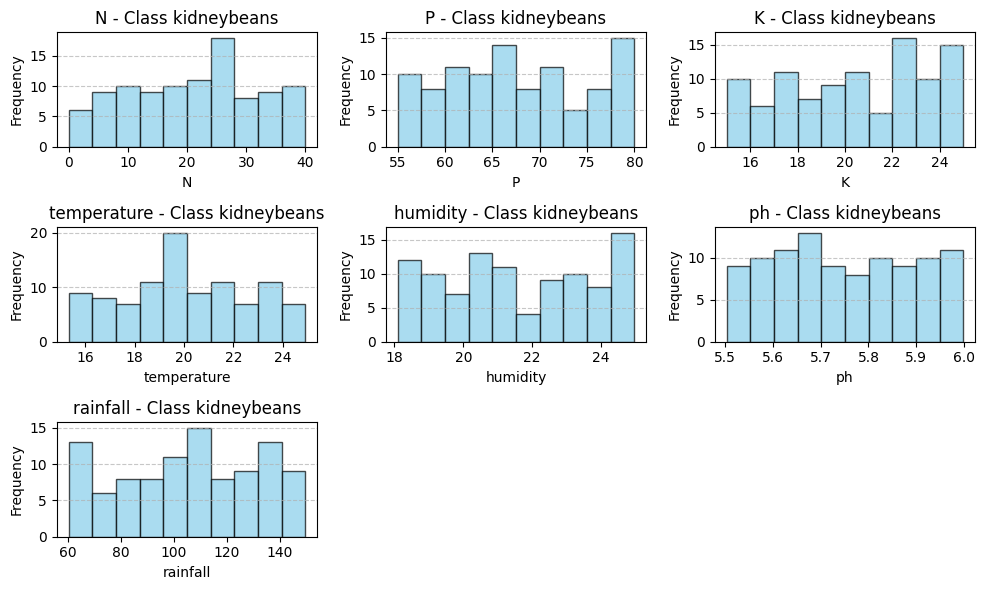

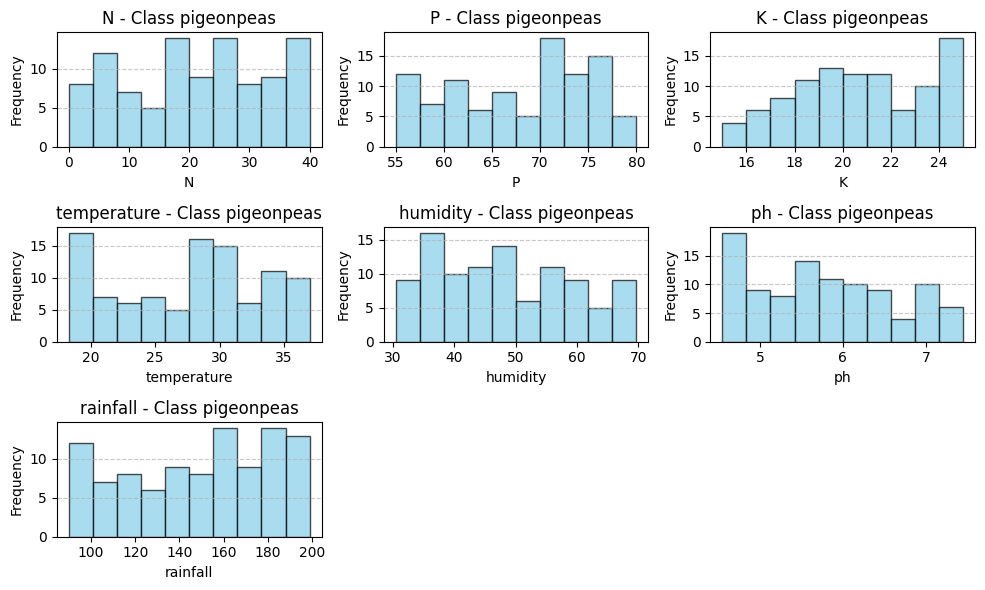

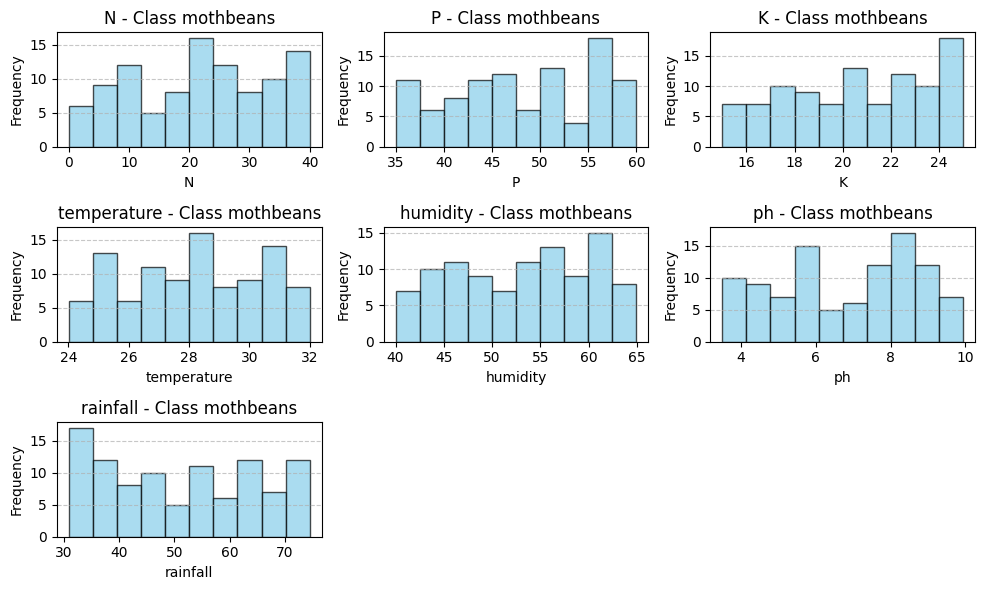

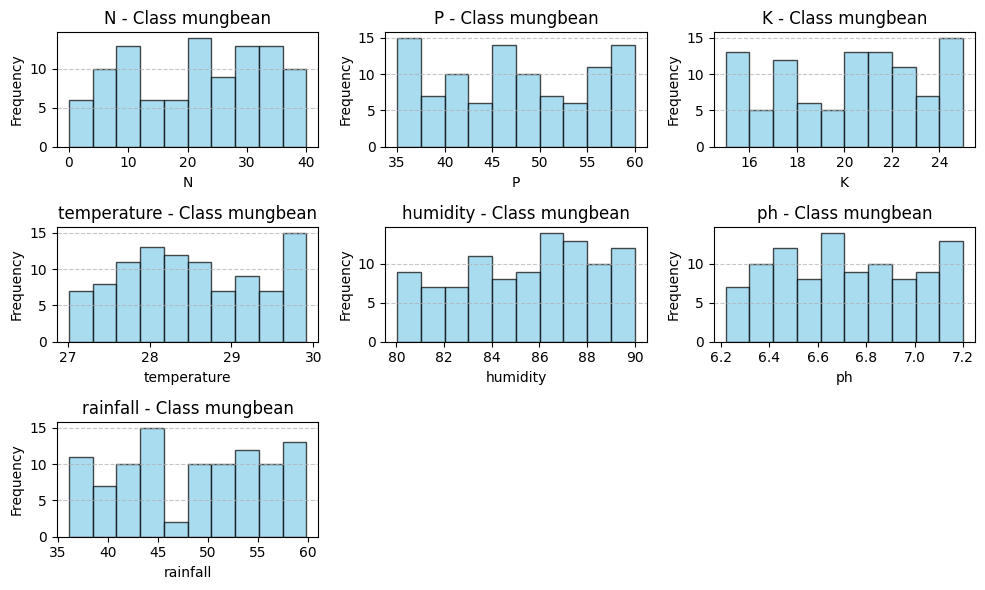

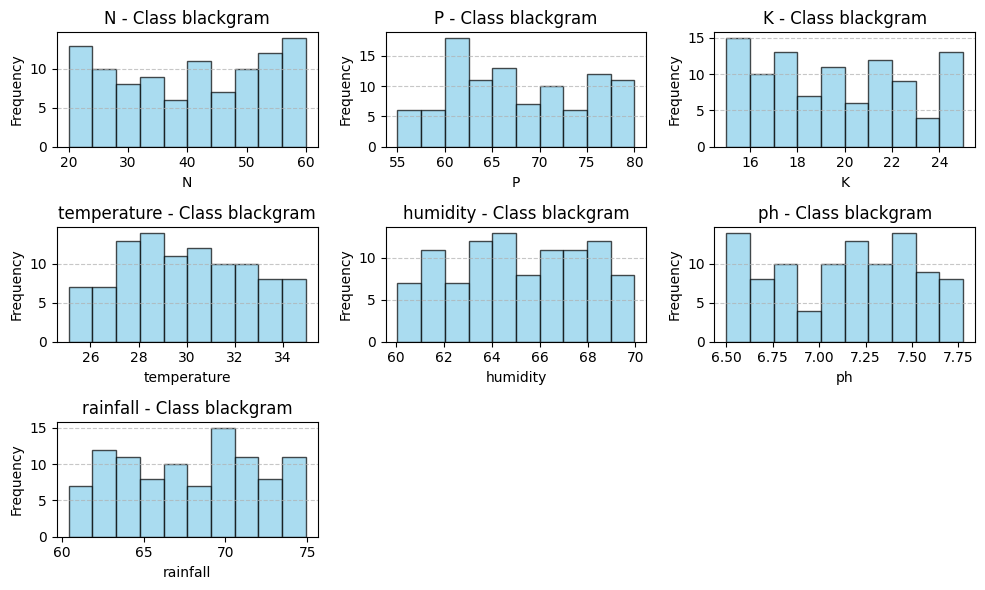

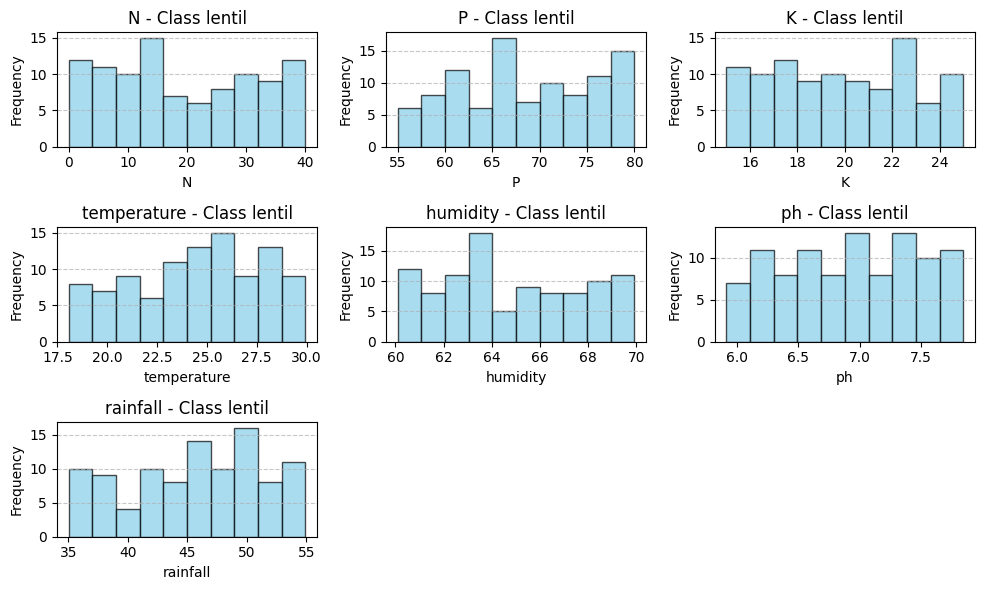

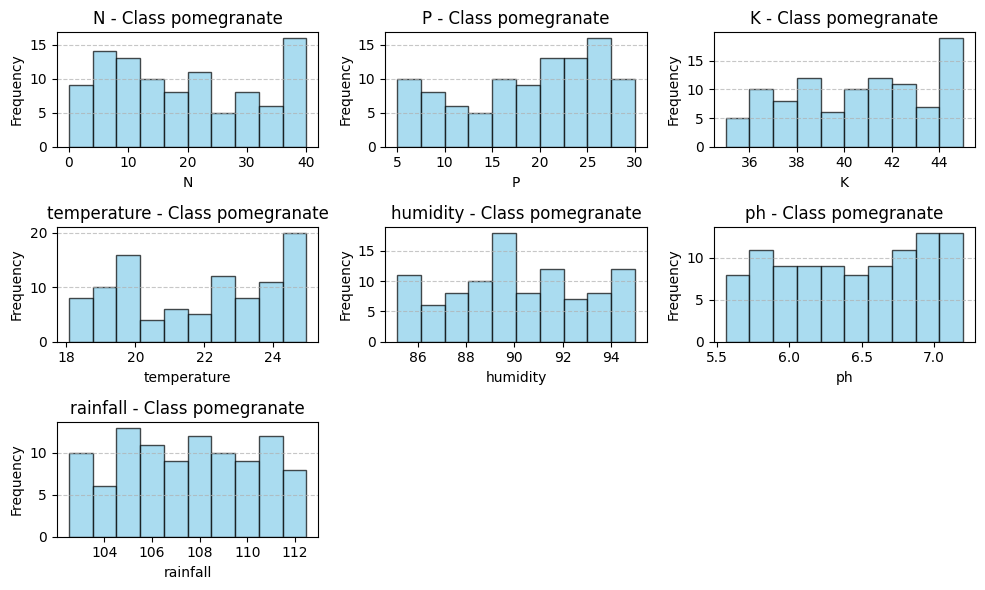

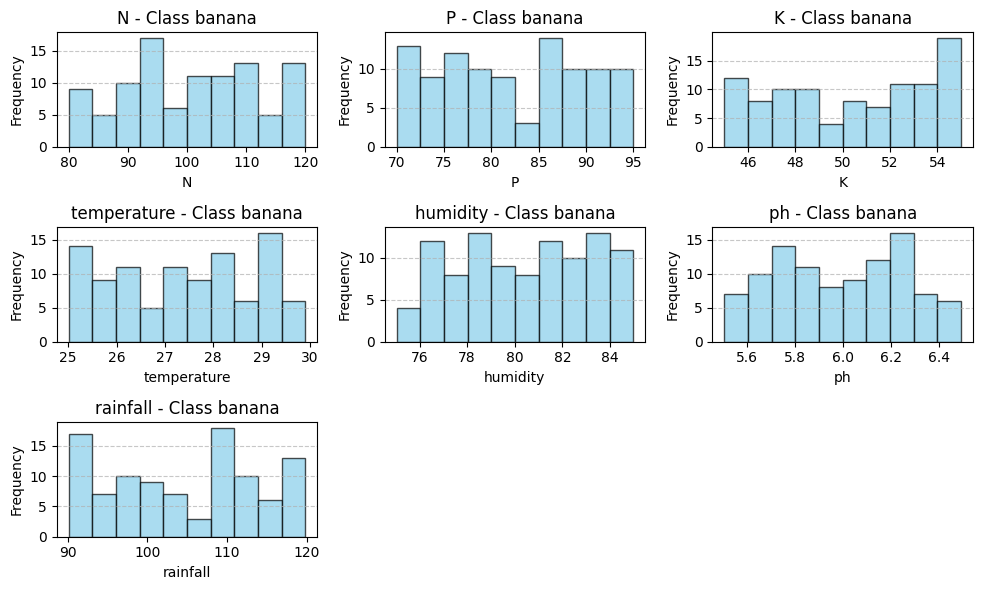

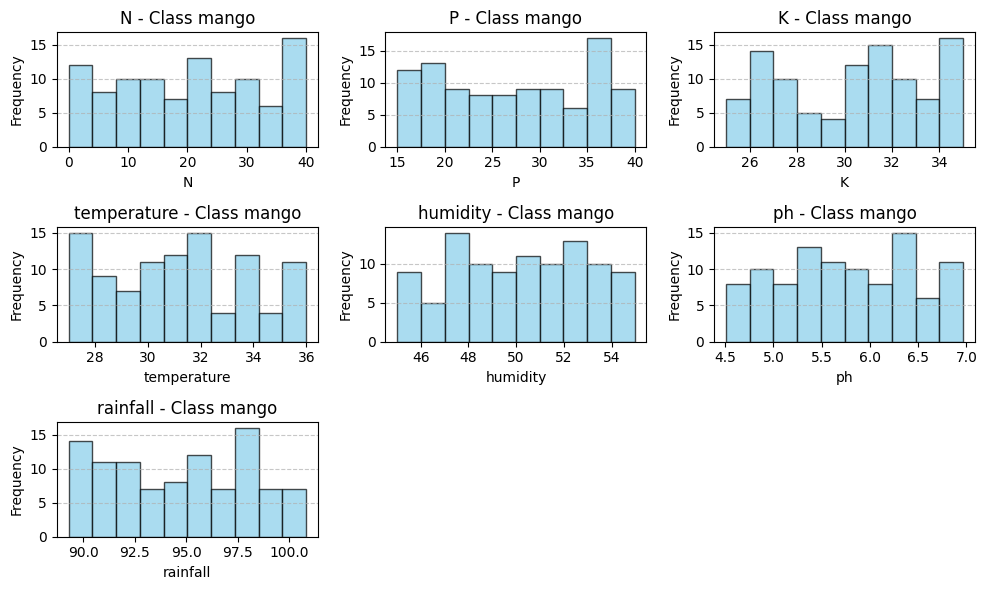

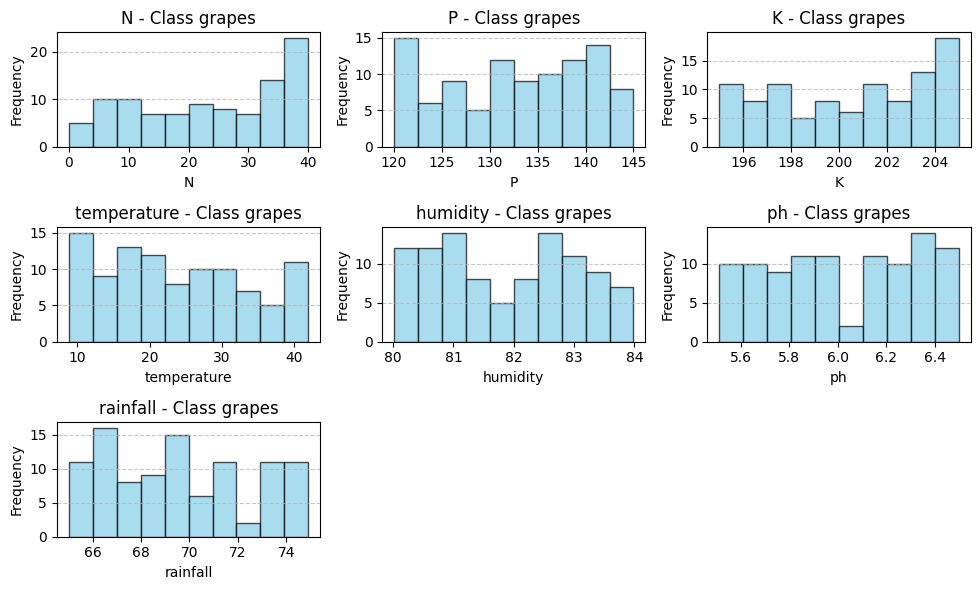

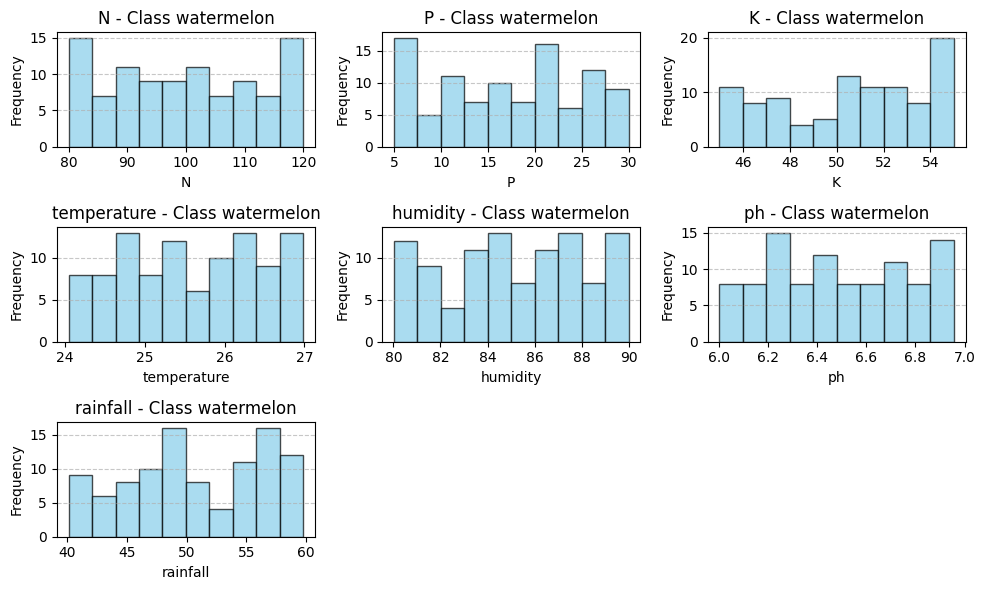

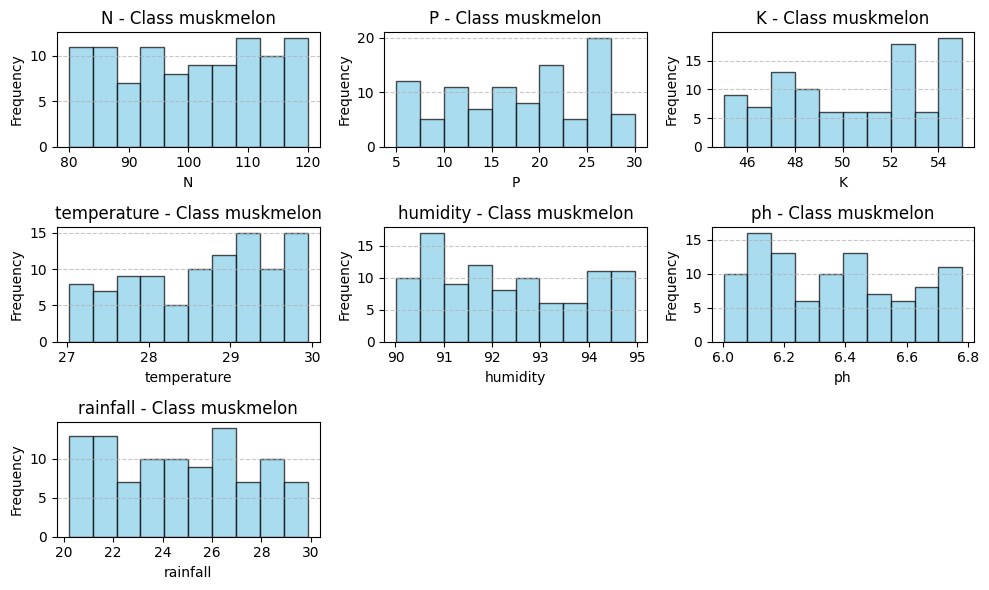

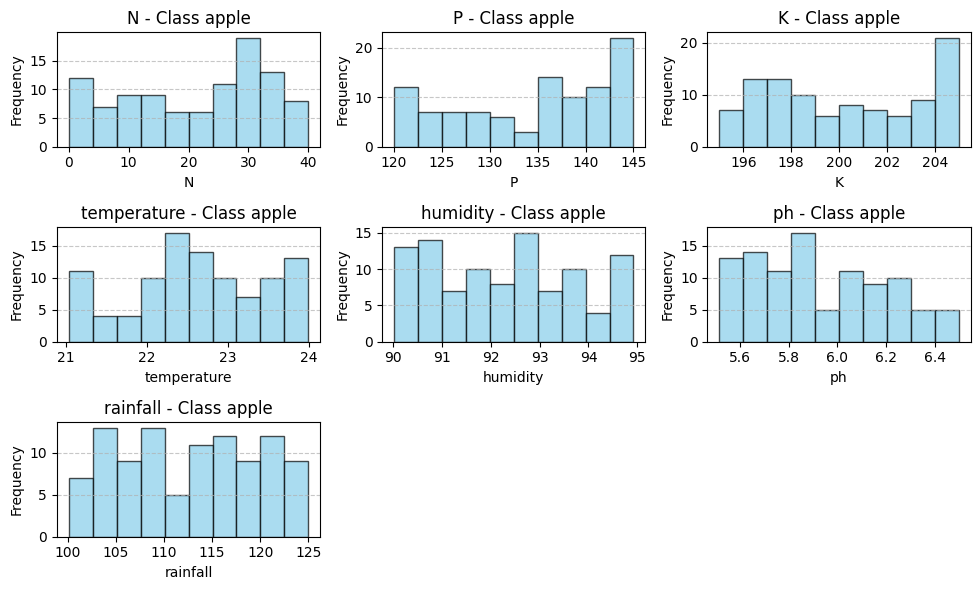

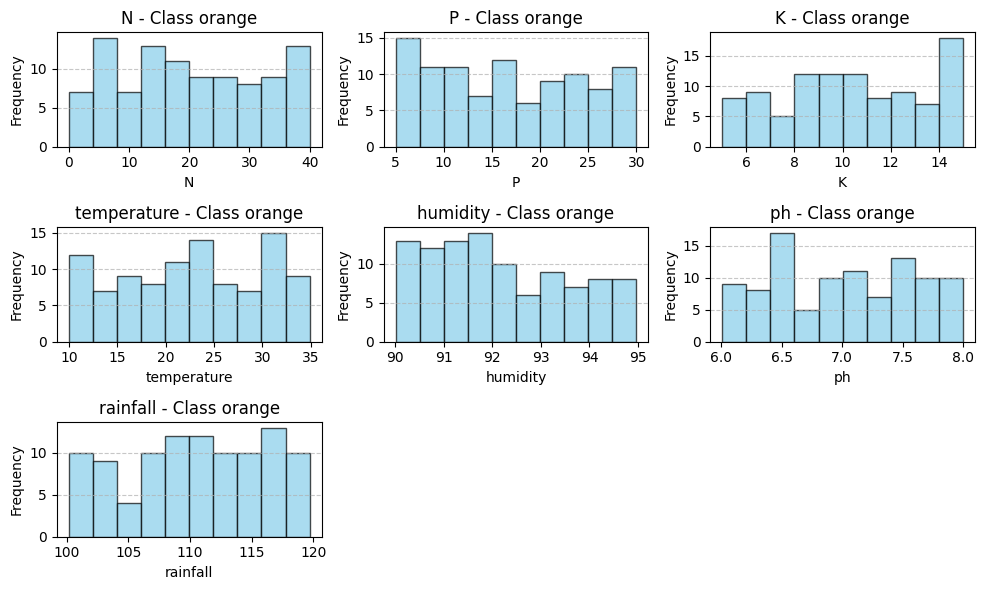

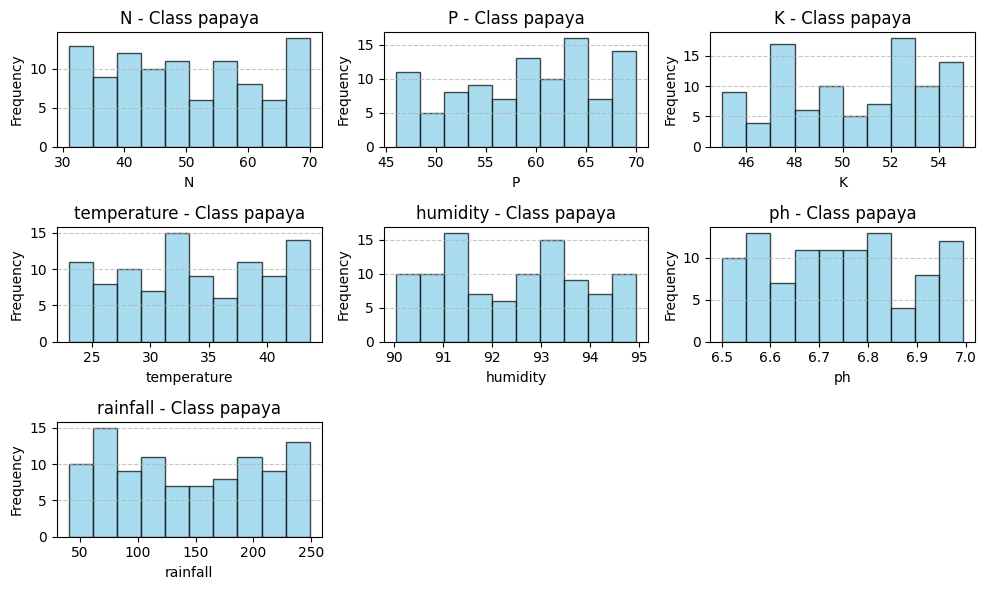

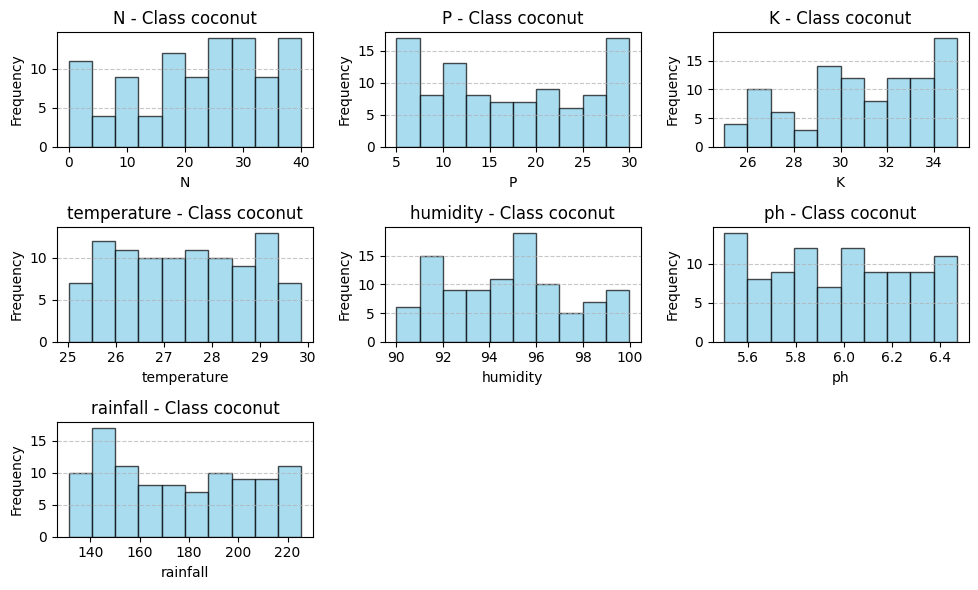

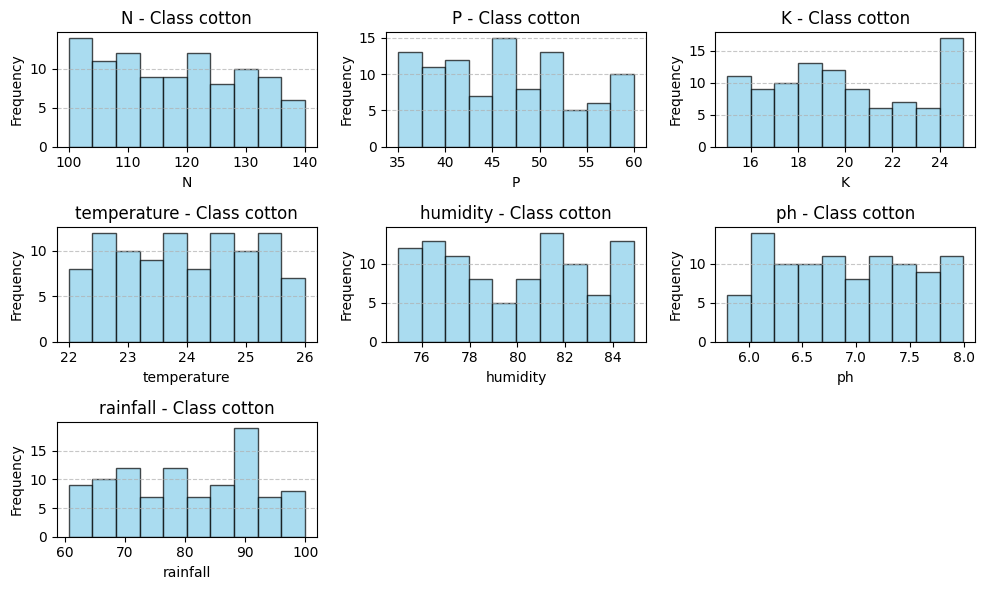

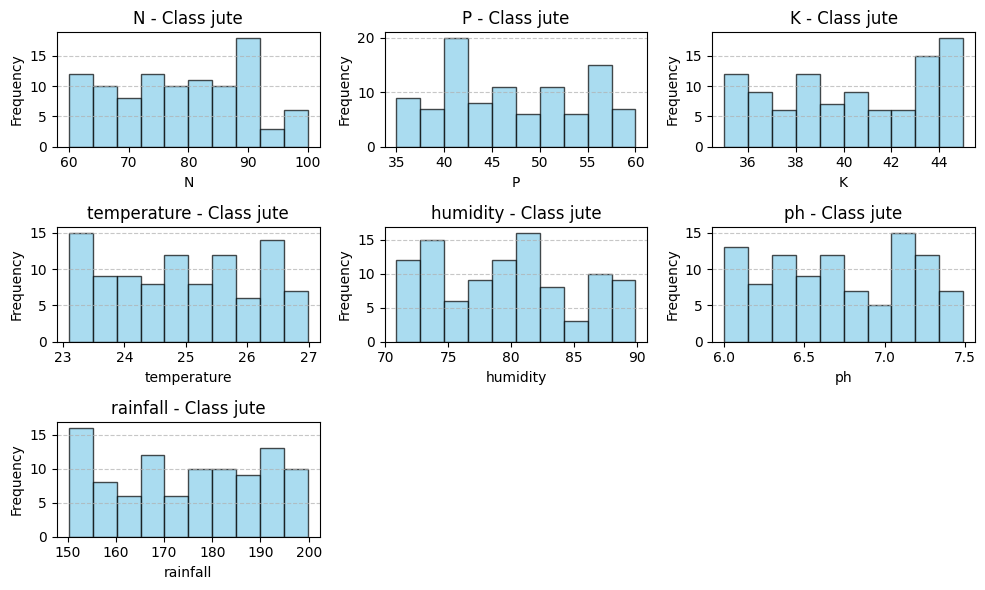

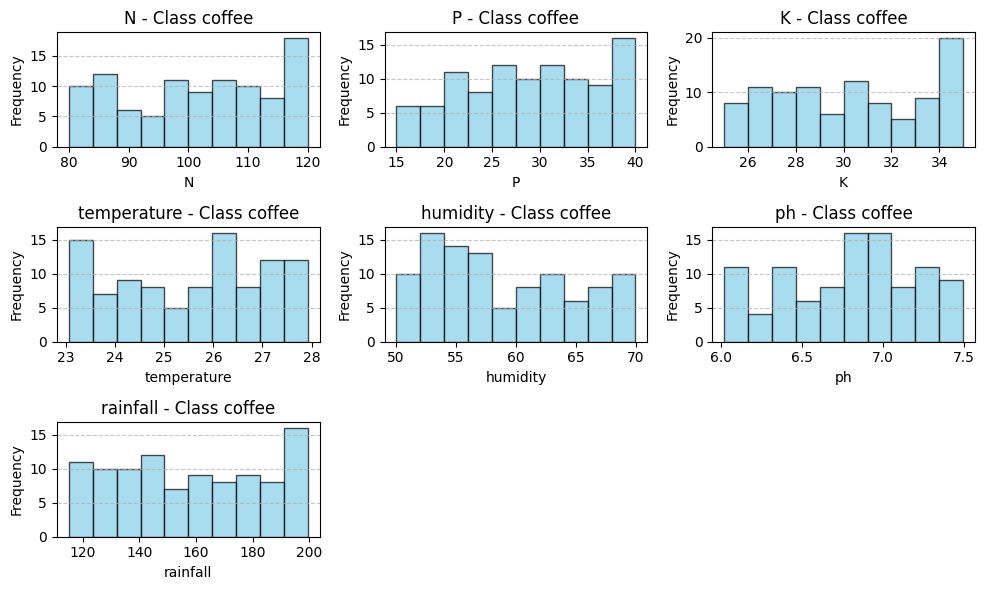

In [7]:
import matplotlib.pyplot as plt

# Assuming df contains the dataset with features and labels
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Get unique classes
classes = df['label'].unique()

# Iterate through each class
for class_label in classes:
    plt.figure(figsize=(10, 6))
    # Filter the dataframe for the current class
    class_data = df[df['label'] == class_label]
    # Plot bar charts for each feature
    for feature in features:
        plt.subplot(3, 3, features.index(feature) + 1)
        plt.hist(class_data[feature], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'{feature} - Class {class_label}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [8]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [9]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1760 1760 440 440


In [11]:
modelDNN = Sequential()
# model.add(Dense(64, input_shape=(7,), activation='relu'))

modelDNN.add(Dense(32, activation='relu'))
modelDNN.add(Dense(64, activation='relu'))
modelDNN.add(Dense(128, activation='relu'))
modelDNN.add(Dense(22, activation='softmax'))

# Compile the model
modelDNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = modelDNN.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
176/176 [==============================] - 3s 10ms/step - loss: 2.3412 - accuracy: 0.5886 - val_loss: 0.6712 - val_accuracy: 0.7932
Epoch 2/50
176/176 [==============================] - 1s 5ms/step - loss: 0.3971 - accuracy: 0.8676 - val_loss: 0.3309 - val_accuracy: 0.8841
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9193 - val_loss: 0.4054 - val_accuracy: 0.8727
Epoch 4/50
176/176 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9165 - val_loss: 0.2810 - val_accuracy: 0.8977
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 0.9352 - val_loss: 0.2198 - val_accuracy: 0.9136
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.1450 - accuracy: 0.9494 - val_loss: 0.3797 - val_accuracy: 0.9045
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9426 - val_loss: 0.2196 - val_accuracy: 0.9114
Epoch

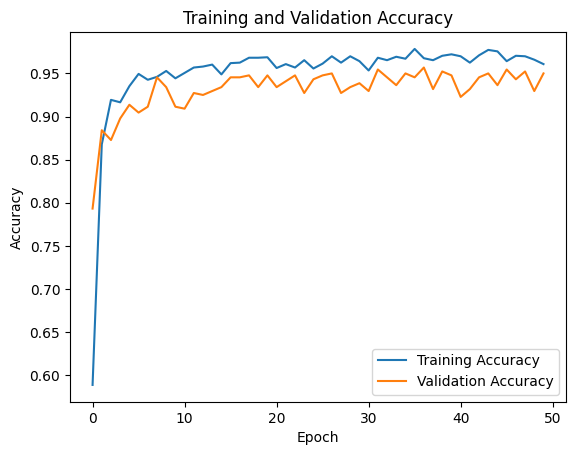

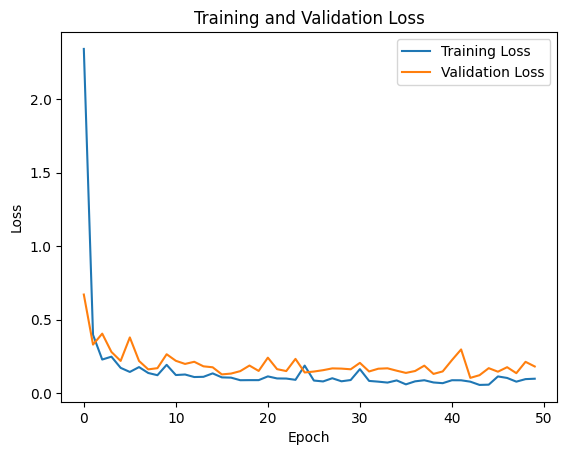

In [12]:
# Training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [13]:
# Evaluate the model on the train set
train_loss, train_accuracy = modelDNN.evaluate(x_train, y_train, verbose=0)
print(f"Train Set - Loss: {train_loss:.6f}, Accuracy: {train_accuracy:.6f}")

# Evaluate the model on the test set
test_loss, test_accuracy = modelDNN.evaluate(x_test, y_test, verbose=0)
print(f"Test Set - Loss: {test_loss:.6f}, Accuracy: {test_accuracy:.6f}")

Train Set - Loss: 0.079398, Accuracy: 0.966477
Test Set - Loss: 0.182140, Accuracy: 0.950000


In [ ]:
a={'decision tree': {
    'model': DecisionTreeClassifier(),
    'params': {
        'decisiontreeclassifier__criterion': ['gini'],
        'decisiontreeclassifier__splitter': ['best'],
        'decisiontreeclassifier__min_samples_split': [2],
        'decisiontreeclassifier__min_samples_leaf': [1],
        'decisiontreeclassifier__min_impurity_decrease': [0.0]
    }
},

'svm': {
    'model': SVC(probability=True),
    'params': {
        'svc__C': [100],
        'svc__kernel': ['rbf'],
        'svc__shrinking': [True],
        'svc__class_weight': [None]
    }
},

'random_forest': {
    'model': RandomForestClassifier(),
    'params': {
        'randomforestclassifier__n_estimators': [10],
        'randomforestclassifier__max_depth': [30],
        'randomforestclassifier__min_samples_split': [10],
        'randomforestclassifier__min_samples_leaf': [1]
    }
},

'k classifier': {
    'model': KNeighborsClassifier(),
    'params': {
        'kneighborsclassifier__n_neighbors': [5],
        'kneighborsclassifier__weights': ['distance'],
        'kneighborsclassifier__algorithm': ['auto'],
        'kneighborsclassifier__p': [1],
        'kneighborsclassifier__metric': ['manhattan']
    }
},

'gradient_boosting': {
    'model': GradientBoostingClassifier(),
    'params': {
        'gradientboostingclassifier__n_estimators': [50],
        'gradientboostingclassifier__learning_rate': [0.2],
        'gradientboostingclassifier__max_depth': [3]
    }
},

'lgbm_classifier': {
    'model': LGBMClassifier(),
    'params': {
        'lgbmclassifier__n_estimators': [100],
        'lgbmclassifier__learning_rate': [0.1]
    }
},


'gaussian_naive_bayes': {
    'model': GaussianNB(),
    'params': {
        'gaussiannb__var_smoothing': np.logspace(0,-9, num=100)
     }
},

   'mlp_classifier': {
    'model': MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.1),
    'params': {
        'mlpclassifier__hidden_layer_sizes': [(50, 50)],
        'mlpclassifier__activation': ['relu'],
        'mlpclassifier__max_iter': [500],
        'mlpclassifier__solver': ['adam'],
        'mlpclassifier__alpha': [0.0001],
        'mlpclassifier__learning_rate': ['constant'],
        'mlpclassifier__learning_rate_init': [0.01]
    }
  }

}

In [ ]:
  score = []
details = []
best_param = {}

for mdl, par in tqdm(a.items(), desc="Training Models"):
    start_time = time.time()
    pipe = make_pipeline(preprocessing.StandardScaler(), par['model'])
    res = model_selection.GridSearchCV(pipe, par['params'], cv=20, verbose=False)
    res.fit(x_train, y_train)

    score.append({
        'Model name': mdl,
        'Best score': res.best_score_,
        'Best param': res.best_params_,
        'Training Time': round(time.time() - start_time, 2)
    })

    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl] = res.best_estimator_

pd.DataFrame(score)

Training Models:  62%|██████▎   | 5/8 [02:24<02:29, 49.89s/it]

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Training Models: 100%|██████████| 8/8 [03:38<00:00, 27.36s/it]


,Model name,Best score,Best param,Training Time
0,decision tree,0.985227,"{'decisiontreeclassifier__criterion': 'gini', ...",0.55
1,svm,0.988636,"{'svc__C': 100, 'svc__class_weight': None, 'sv...",7.27
2,random_forest,0.993182,"{'randomforestclassifier__max_depth': 30, 'ran...",1.09
3,k classifier,0.982955,"{'kneighborsclassifier__algorithm': 'auto', 'k...",0.24
4,gradient_boosting,0.991477,{'gradientboostingclassifier__learning_rate': ...,135.02
5,lgbm_classifier,0.990909,"{'lgbmclassifier__learning_rate': 0.1, 'lgbmcl...",38.98
6,gaussian_naive_bayes,0.994318,{'gaussiannb__var_smoothing': 0.00351119173421...,21.38
7,mlp_classifier,0.982386,"{'mlpclassifier__activation': 'relu', 'mlpclas...",14.32


In [ ]:
score

[{'Model name': 'decision tree',
  'Best score': 0.9852272727272726,
  'Best param': {'decisiontreeclassifier__criterion': 'gini',
   'decisiontreeclassifier__min_impurity_decrease': 0.0,
   'decisiontreeclassifier__min_samples_leaf': 1,
   'decisiontreeclassifier__min_samples_split': 2,
   'decisiontreeclassifier__splitter': 'best'},
  'Training Time': 0.55},
 {'Model name': 'svm',
  'Best score': 0.9886363636363636,
  'Best param': {'svc__C': 100,
   'svc__class_weight': None,
   'svc__kernel': 'rbf',
   'svc__shrinking': True},
  'Training Time': 7.27},
 {'Model name': 'random_forest',
  'Best score': 0.9931818181818182,
  'Best param': {'randomforestclassifier__max_depth': 30,
   'randomforestclassifier__min_samples_leaf': 1,
   'randomforestclassifier__min_samples_split': 10,
   'randomforestclassifier__n_estimators': 10},
  'Training Time': 1.09},
 {'Model name': 'k classifier',
  'Best score': 0.9829545454545453,
  'Best param': {'kneighborsclassifier__algorithm': 'auto',
   'kn

In [ ]:
pd.DataFrame(score)

,Model name,Best score,Best param,Training Time
0,decision tree,0.985227,"{'decisiontreeclassifier__criterion': 'gini', ...",0.55
1,svm,0.988636,"{'svc__C': 100, 'svc__class_weight': None, 'sv...",7.27
2,random_forest,0.993182,"{'randomforestclassifier__max_depth': 30, 'ran...",1.09
3,k classifier,0.982955,"{'kneighborsclassifier__algorithm': 'auto', 'k...",0.24
4,gradient_boosting,0.991477,{'gradientboostingclassifier__learning_rate': ...,135.02
5,lgbm_classifier,0.990909,"{'lgbmclassifier__learning_rate': 0.1, 'lgbmcl...",38.98
6,gaussian_naive_bayes,0.994318,{'gaussiannb__var_smoothing': 0.00351119173421...,21.38
7,mlp_classifier,0.982386,"{'mlpclassifier__activation': 'relu', 'mlpclas...",14.32


In [ ]:
# Evaluate the model on the train set
train_loss, train_accuracy = modelDNN.evaluate(x_train, y_train, verbose=0)
print(f"Train Set - Loss: {train_loss:.6f}, Accuracy: {train_accuracy:.6f}")

Train Set - Loss: 0.071712, Accuracy: 0.970455


In [ ]:
# This is for test set testing


for i in best_param.keys():
    print(f'{i} : {best_param[i].score(x_test, y_test)}')

# Evaluate the DNNmodel on the test set
test_loss, test_accuracy = modelDNN.evaluate(x_test, y_test, verbose=0)
print(f"Deep Neural Network - Loss: {test_loss:.6f}, Accuracy: {test_accuracy:.6f}")

decision tree : 0.9840909090909091
svm : 0.975
random_forest : 0.9863636363636363
k classifier : 0.9772727272727273
gradient_boosting : 0.9863636363636363
lgbm_classifier : 0.9863636363636363
gaussian_naive_bayes : 0.9931818181818182
mlp_classifier : 0.9681818181818181
Deep Neural Network - Loss: 0.122671, Accuracy: 0.961364


In [ ]:
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# # Initialize lists to store evaluation metrics
# classifier_names = []
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []

# # Evaluate each bagging classifier
# for model_name, bagging_model in bagging_classifiers.items():
#     y_pred = bagging_model.predict(x_test)

#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')

#     # Append results to lists
#     classifier_names.append(model_name)
#     accuracy_scores.append(accuracy)
#     precision_scores.append(precision)
#     recall_scores.append(recall)
#     f1_scores.append(f1)

# # Create DataFrame
# results_df = pd.DataFrame({
#     'Classifier': classifier_names,
#     'Accuracy': accuracy_scores,
#     'Precision': precision_scores,
#     'Recall': recall_scores,
#     'F1-score': f1_scores
# })

# # Display the DataFrame
# # print(results_df)

# # Evaluate DNN
# y_pred_dnn = modelDNN.predict(x_test)
# y_pred_dnn = y_pred_dnn.argmax(axis=1)
# report_dnn = classification_report(y_test, y_pred_dnn, output_dict=True)

# # Extract metrics from the classification report
# accuracy_dnn = report_dnn['accuracy']
# precision_dnn = report_dnn['weighted avg']['precision']
# recall_dnn = report_dnn['weighted avg']['recall']
# f1_dnn = report_dnn['weighted avg']['f1-score']

# # Update the DNN metrics directly in the DataFrame
# results_df.loc[10] = ['DNN', accuracy_dnn, precision_dnn, recall_dnn, f1_dnn]

# # Display the updated DataFrame
# print(results_df)

In [ ]:
bagging_classifiers = {}

for model_name, model_params in a.items():
    model = model_params['model']
    params = model_params['params']

    # Create a pipeline with preprocessing and the model
    pipe = make_pipeline(preprocessing.StandardScaler(), model)

    # Create a Bagging Classifier with the pipeline as the base estimator
    bagging_model = BaggingClassifier(estimator=pipe, n_estimators=100, oob_score=True, random_state=42, max_samples=0.8)

    # Store the Bagging Classifier in the dictionary
    bagging_classifiers[model_name] = bagging_model


In [ ]:
# bagging_model.fit(x_train,y_train)

# Train each bagging classifier
for model_name, bagging_model in bagging_classifiers.items():
    bagging_model.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

14/14 [==============================] - 0s 3ms/step


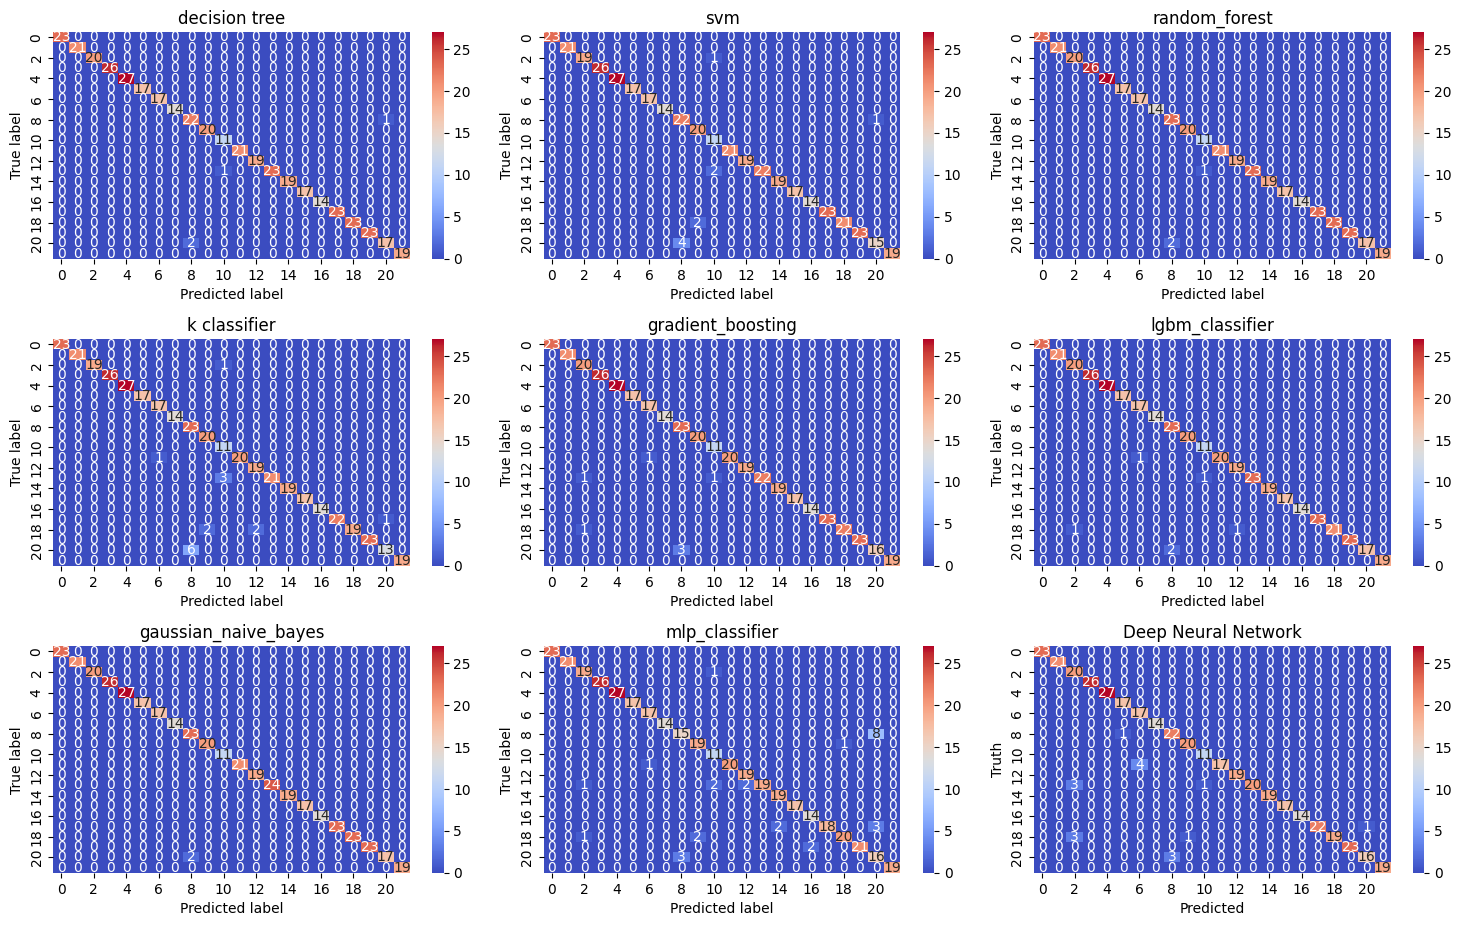

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Create a figure to hold the subplots
# plt.figure(figsize=(15, 12))

# # Loop through each bagging classifier
# for i, (model_name, bagging_model) in enumerate(bagging_classifiers.items(), start=1):
#     # Predict the labels using the bagging classifier
#     predicted = bagging_model.predict(x_test)

#     # Calculate the confusion matrix
#     cm = confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.subplot(3, 3, i)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
#     plt.title(model_name)
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')

# plt.tight_layout()
# plt.show()




import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 12))

for i, (model_name, bagging_model) in enumerate(bagging_classifiers.items(), start=1):

    predicted = bagging_model.predict(x_test)

    cm = confusion_matrix(y_test, predicted)

    plt.subplot(4, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(model_name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

# Plot the confusion matrix for the Deep Neural Network
y_pred_prob = modelDNN.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

cm = confusion_matrix(y_test, y_pred)

plt.subplot(4, 3, 9)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Deep Neural Network')

plt.tight_layout()
plt.show()


In [ ]:
# bagging_model.score(x_test,y_test)

from sklearn.metrics import classification_report

# Evaluate each bagging classifier
for model_name, bagging_model in bagging_classifiers.items():
    y_pred = bagging_model.predict(x_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred, digits=6))


# Evaluate DNN
y_pred = modelDNN.predict(x_test)
y_pred = y_pred.argmax(axis=1)
report = classification_report(y_test, y_pred)
print("Deep Neural Network")
print(report)


Model: decision tree
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        23
           1   1.000000  1.000000  1.000000        21
           2   1.000000  1.000000  1.000000        20
           3   1.000000  1.000000  1.000000        26
           4   1.000000  1.000000  1.000000        27
           5   1.000000  1.000000  1.000000        17
           6   1.000000  1.000000  1.000000        17
           7   1.000000  1.000000  1.000000        14
           8   0.916667  0.956522  0.936170        23
           9   1.000000  1.000000  1.000000        20
          10   0.916667  1.000000  0.956522        11
          11   1.000000  1.000000  1.000000        21
          12   1.000000  1.000000  1.000000        19
          13   1.000000  0.958333  0.978723        24
          14   1.000000  1.000000  1.000000        19
          15   1.000000  1.000000  1.000000        17
          16   1.000000  1.000000  1.000000        14
      

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize lists to store evaluation metrics
classifier_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate each bagging classifier
for model_name, bagging_model in bagging_classifiers.items():
    y_pred = bagging_model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results to lists
    classifier_names.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create DataFrame
results_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Display the DataFrame
# print(results_df)

# Evaluate DNN
y_pred_dnn = modelDNN.predict(x_test)
y_pred_dnn = y_pred_dnn.argmax(axis=1)
report_dnn = classification_report(y_test, y_pred_dnn, output_dict=True)

# Extract metrics from the classification report
accuracy_dnn = report_dnn['accuracy']
precision_dnn = report_dnn['weighted avg']['precision']
recall_dnn = report_dnn['weighted avg']['recall']
f1_dnn = report_dnn['weighted avg']['f1-score']

# Update the DNN metrics directly in the DataFrame
results_df.loc[8] = ['DNN', accuracy_dnn, precision_dnn, recall_dnn, f1_dnn]

# Display the updated DataFrame
print(results_df)

14/14 [==============================] - 0s 2ms/step
             Classifier  Accuracy  Precision    Recall  F1-score
0         decision tree  0.990909   0.991162  0.990909  0.990915
1                   svm  0.977273   0.979770  0.977273  0.977420
2         random_forest  0.993182   0.993735  0.993182  0.993175
3          k classifier  0.963636   0.969043  0.963636  0.963429
4     gradient_boosting  0.984091   0.985607  0.984091  0.984046
5       lgbm_classifier  0.986364   0.987265  0.986364  0.986316
6  gaussian_naive_bayes  0.995455   0.995818  0.995455  0.995423
7        mlp_classifier  0.934091   0.942842  0.934091  0.934629
8                   DNN  0.961364   0.966944  0.961364  0.961428


In [ ]:
# Save the DataFrame to an Excel file
results_df.to_excel('classification_results.xlsx', index=True)

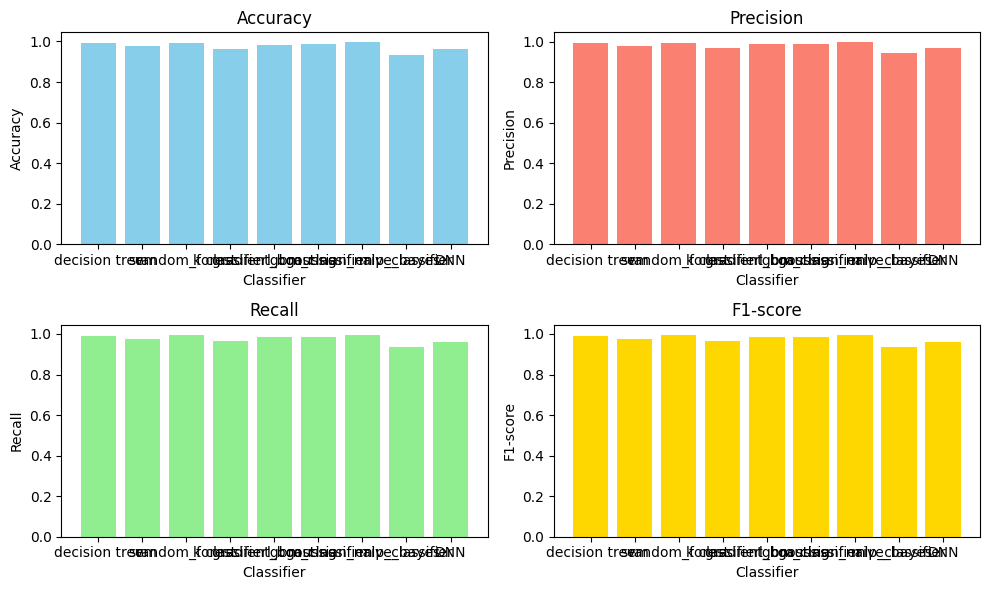

In [ ]:
import matplotlib.pyplot as plt

# Plotting bar graphs for each evaluation metric
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.subplot(2, 2, 1)
plt.bar(results_df['Classifier'], results_df['Accuracy'], color='skyblue')
plt.title('Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Plotting precision
plt.subplot(2, 2, 2)
plt.bar(results_df['Classifier'], results_df['Precision'], color='salmon')
plt.title('Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision')

# Plotting recall
plt.subplot(2, 2, 3)
plt.bar(results_df['Classifier'], results_df['Recall'], color='lightgreen')
plt.title('Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall')

# Plotting F1-score
plt.subplot(2, 2, 4)
plt.bar(results_df['Classifier'], results_df['F1-score'], color='gold')
plt.title('F1-score')
plt.xlabel('Classifier')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()
